Import annotated data set

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\alexi\Documents\UM DKE\Year 3\Thesis\Food-Health-Claims-KG_clean.csv")
print(str(df["Food"].value_counts().size) + " different foods")
print(str(df["Phenotype"].value_counts().size) + " different phenotypes")

77 different foods
97 different phenotypes


In [3]:
count = 0
for i in range(0,df["Food"].size):
    #print(type(df["Claim"].loc[i]))

    if isinstance(df["Claim"].loc[i], float)  :
        count= count+1
        #print(count#)
print(str(count) + " empty claims")
print(df["Claim"].size - count)

878 empty claims
235


Only authorized claims are annotated

In [4]:
for i in range(len(df["Food"])):
    df["Food"].iloc[i] = str(df["Food"].iloc[i]).strip()
    df["Phenotype"].iloc[i] = str(df["Phenotype"].iloc[i]).strip()

C:\Users\alexi\AppData\Local\Temp\ipykernel_22496\2552141843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Food"].iloc[i] = str(df["Food"].iloc[i]).strip()
C:\Users\alexi\AppData\Local\Temp\ipykernel_22496\2552141843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Phenotype"].iloc[i] = str(df["Phenotype"].iloc[i]).strip()


In [5]:
df.columns
ddf = df.dropna(subset="Claim")
ddf = ddf.dropna(subset="Food")
ddf = ddf.dropna(subset="Relationship-effect")
ddf = ddf.dropna(subset="Health relationship")

ddf.reset_index()

print(str(ddf["Food"].value_counts().size) + " different foods")
print(str(ddf["Phenotype"].value_counts().size) + " different phenotypes")

77 different foods
96 different phenotypes


In [6]:
ddf["Relationship-effect"].unique()
#ddf["Relationship-effect"].loc[8]

array(['Maintenance of a function', 'Enhancing a function',
       'Reducing a risk factor'], dtype=object)

In [19]:
cnt = test.groupby('Relationship-effect').Claim.count()
print("Enhancing a function : " + str(cnt[0]/len(test["Claim"])) + "%")
print("Maintenance a function : " + str(cnt[1]/len(test["Claim"]))+ "%")
print("Reducing a risk factor : " + str(cnt[2]/len(test["Claim"]))+ "%")
(78, 12, 10)

Enhancing a function : 0.12340425531914893%
Maintenance a function : 0.7787234042553192%
Reducing a risk factor : 0.09787234042553192%


(78, 12, 10)

The definition of dictionaries is issued from : 
Schulte, L. (2022). Knowledge Extraction from EU Food Health Claim
Data using NLP, Maastricht University unpublishe

In [8]:
synonym_food = dict()
synonym_phenotype = dict()

In [9]:
#add to the synonym dictionary for foods for the authorised datset
synonym_food['Alpha-linolenic acid (ALA)'.lower()] = ['ALA'.lower()]
synonym_food['hydroxypropyl methylcellulose (hpmc)'.lower()] = ['hydroxypropyl methylcellulose']
synonym_food['arabinoxylan produced from wheat endosperm'.lower()] = ['arabinoxylan']
synonym_food['beta-glucans from oats and barley']  = ['beta-glucans from oats or barley']
synonym_food['sugar replacers, i.e. intense sweeteners; xylitol, sorbitol, mannitol, maltitol, lactitol, isomalt, erythritol, sucralose and polydextrose; d-tatatose and isomaltulose'.lower()] = ['[name of sugar replacer]']
synonym_food['docosahexaenoic acid and eicosapentaenoic acid (dha/epa)'] = ['dha and epa']
synonym_food['docosahexaenoic acid (dha)'] = ['dha']
synonym_food['dried plums of \'prune\' cultivars (prunus domestica)'] = ['dried plums/prunes']
synonym_food['eicosapentaenoic acid and docosahexaenoic acid (epa/dha)'] = ['epa and dha']
synonym_food['glucomannan (konjac mannan)'] = ['glucomannan']
synonym_food['live yoghurt cultures'] = ['live cultures in yoghurt']
synonym_food['monascus purpureous (red yeast rice)'] = ['red yeast rice']
synonym_food['plant sterols and plant stanols'] = ['plant sterols/stanols']
synonym_food['foods with a low or reduced content of saturated fatty acids'] = ['reducing consumption of saturated fat']
synonym_food['foods with a low or reduced content of sodium'] = ['reducing consumption of sodium']
synonym_food['monounsaturated and/or polyunsaturated fatty acids'] = ['unsaturated fats']
synonym_food['riboflavin (vitamin b2)'] = ['riboflavin']
synonym_food['meal replacement for weight control'] =  ['meal replacement']
synonym_food['"non-fermentable" carbohydrates'] = ['[name of all used non-fermentable carbohydrates]']


In [10]:
#create to the synonym dictionary for phenotypes for the authorised dataset
synonym_phenotype['excessive flatulence'] = ['exessive flatulence']
synonym_phenotype['normal blood homocysteine'] = ['normal homocysteine metabolism']
synonym_phenotype['endurance performance'] = ['endurance performing']
synonym_phenotype['enhancement of water absorption during physical exercise'] = ['enhance the absorption of water during physical exercise']
synonym_phenotype['normal digestion by gastric acid'] = ['normal digestion']
synonym_phenotype['increased blood glucose'] = ['blood glucose rise']
synonym_phenotype['normal tooth mineralisation'] = ['maintenance of tooth mineralization', 'maintenance of tooth mineralisation']
synonym_phenotype['pigment metabolic process involved in pigment accumulation'] = ['normal hair pigmentation']
synonym_phenotype['normal immune system function'] = ['normal function of the immune system']
synonym_phenotype['increased physical performance'] = ['increases the physical performance']
synonym_phenotype['blood pressure normal'] = ['normal blood pressure']
synonym_phenotype['blood triglycerides normal'] = ['normal blood triglyceride levels']
synonym_phenotype['normal cardiac function'] = ['normal function of the heart']
synonym_phenotype['normal homocysteine level'] = ['normal homocysteine metabolism']
synonym_phenotype['cell division'] = ['cell division', 'cell specialisation']
synonym_phenotype['normal red blood cell formation and normal haemoglobin formation'] = ['normal formation of red blood cells and haemoglobin']
synonym_phenotype['decreased tiredness and fatigue'] = ['reduction of tiredness and fatigue']
synonym_phenotype['lactose intolerance'] = ['difficulty digesting lactose']
synonym_phenotype['intestinal transit time decreased'] = ['acceleration of intestinal transit']
synonym_phenotype['increased iron absorption'] = ['improvement of iron absorption', 'increases iron absorption']
synonym_phenotype['decreased feelings of jet lag'] = ['allevation of subjective feelings of jet lag']
synonym_phenotype['reduction of sleep onset latency'] = ['reduction of time taken to fall asleep']
synonym_phenotype['protection of cells from oxidative stress'] = ['protection of blood lipids from oxidative stress']
synonym_phenotype['normal synthesis and metabolism of \n- steroid hormones\n- vitamin d\n- some neurotransmitters'] = ['normal synthesis and metabolism of steroid hormones, vitamin d and some neurotransmitters']
synonym_phenotype['increased muscle mass'] = ['growth in muscle mass']
synonym_phenotype['normal iron metabolism'] = ['normal metabolism of iron']
synonym_phenotype['reduced weight'] = ['weight loss']
synonym_phenotype['dental plaque'] = ['plaque acids']
synonym_phenotype['homocysteine level'] = ['homocysteine metabolism']
synonym_phenotype['normal red blood cell formation'] = ['normal red blood cell formation']
synonym_phenotype['normal protein metabolism and normal glycogen metabolism'] = ['norrmal protein and glycogen metabolism']
synonym_phenotype['hormone activity'] = ['hormonal activity']
synonym_phenotype['maintenance of immune system after exercise'] = ['maintain the normal function of the immune system during and after intense physical exercise']
synonym_phenotype['regeneration of reduced form of vitamin e'] = ['regeneration of the reduced form of vitamin e']
synonym_phenotype['normal absorption of calcium and normal absorption of phosphorus']  = ['normal absorption/utilisation of calcium and phosphorus']
synonym_phenotype['increased vessel elasticity'] = ['improvement of the elasticity of blood vessels']
synonym_phenotype['body temperature normal'] = ['normal regulation of the body\'s temperature']
synonym_phenotype['intestinal transit time increased'] = ['acceleration of intestinal transit']
synonym_phenotype['normal fatty acid metabolism'] = ['normal metabolism of fatty acids']
synonym_phenotype['normal vitamin a metabolism'] = ['normal metabolism of vitamin a']
synonym_phenotype['enhanced muscle strength'] = ['enhance the effect of resistance training on muscle strength']

In [11]:
#Method to get span of entities in claims from the annotations
def mmm(row):
    claim = row["Claim"].lower()
    food = row["Food"].lower()
    pheno = row["Phenotype"].lower()
    #print (claim,' : ',  food,' : ',pheno )
    
    if food not in claim:
        food = synonym_food[food][0]
        #print("food is not in claim")
    else :
        aaaa = 1
        #print("food is in claim")
    food_pos = (claim.index(food), claim.index(food) + len(food))
    
    if pheno not in claim:
        p = synonym_phenotype[pheno][0]
        if p not in claim:
            p = synonym_phenotype[pheno][1]
        pheno = p
        #print("pheno is not in claim")
    else :
        aaaa = 1
        #print("pheno is in claim")
    pheno_pos = (claim.index(pheno), claim.index(pheno) + len(pheno))

    #print(food_pos)
    #print(pheno_pos)
    return food_pos, pheno_pos


In [12]:
test = ddf
#Create column of 0,1,2 labels for the relationships
test["Rel"] = test["Relationship-effect"]
dict = {"Maintenance of a function" : 0,
        "Enhancing a function" : 1,
       "Reducing a risk factor" : 2}
for i in range(0, len(test["Claim"])):
    test["Rel"].iloc[i] = dict[test["Relationship-effect"].iloc[i]]
test

C:\Users\alexi\AppData\Local\Temp\ipykernel_22496\3396981274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Rel"].iloc[i] = dict[test["Relationship-effect"].iloc[i]]


,Status,Claim,Claim Type,Food,NEW Food Type,Food Type,Food Matrix OLD,Regulation specifications,NEW Food Matrix,Food Ontology Term,...,Supporting Evidence Reference 5,Supporting Evidence Text 6,Supporting Evidence Reference 6,Supporting Evidence Text 7,Supporting Evidence Reference 7,Supporting Evidence Text 8,Supporting Evidence Reference 8,Supporting Evidence Text 9,Supporting Evidence Reference 9,Rel
1,Finished,ALA contributes to the maintenance of normal b...,Art. 13(1),Alpha-linolenic acid (ALA),Nutrient,Macronutrient,May be used only for food which is at least a ...,A claim that a food is a source of omega-3 fat...,Matrix: food (general)\nMust contain: ALA\n- U...,https://foodb.ca/compounds/FDB012462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Finished,Activated charcoal contributes to reducing exe...,Art. 13(1),Activated charcoal,Compound,BioactiveCompound,NaN,NaN,Matrix: food supplement\nMust contain: activat...,https://foodb.ca/compounds/FDB008898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Finished,Barley grain fibre contributes to an increase ...,Art. 13(1),Barley grain fibre,Nutrient,Macronutrient,May be used only for food which is high in tha...,"A claim that a food is high in fibre, and any ...",Matrix: food (general)\nMust contain: Barley g...,https://foodb.ca/foods/FOOD00088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Finished,Beta-glucans contribute to the maintenance of ...,Art. 13(1),Beta-glucans,Nutrient,Macronutrient,May be used only for food which contains at le...,NaN,Matrix: food (general)\nMust contain: beta-glu...,https://foodb.ca/compounds/FDB005762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,Finished,Betaine contributes to normal homocysteine met...,Art. 13(1),Betaine,Compound,BioactiveCompound,May be used only for food which contains at le...,NaN,Matrix: food (general)\nMust contain: betaine\...,https://foodb.ca/compounds/FDB009020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Finished,Consumption of foods/drinks containing [name o...,Art. 13(5),Non-digestible carbohydrates,Nutrient,Macronutrient,Sugars should be replaced in foods or drinks b...,A claim stating that the content in one or mor...,Unit: %\nvalue: -30\nprecondition: compared to...,https://foodb.ca/nutrients/FDBN00003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
233,Finished,Consumption of foods/drinks containing [name o...,Art. 13(5),"""Non-fermentable"" carbohydrates",Nutrient,Macronutrient,Fermentable carbohydrates should be replaced i...,NaN,Fermentable carbohydrates should be replaced i...,https://foodb.ca/nutrients/FDBN00003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
234,Finished,Daily creatine consumption can enhance the eff...,Art. 13(5),Creatine,Nutrient,Macronutrient,"Foods targeting adults over the age of 55, who...",NaN,Matrix: foods targeted at people over 55.,https://foodb.ca/compounds/FDB005403,...,Chrusch et al. (2001): 10.1097/00005768-200112...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
235,Finished,Lactitol contributes to normal bowel function ...,Art. 13(5),Lactitol,Nutrient,Macronutrient,Food supplements which contain 10g of lactitol...,NaN,Unit: g/supplement\nValue: 10\nMatrix: supplement,https://foodb.ca/compounds/FDB020779,...,Patil et al. (1987a): 10.1079/bjn19870025; Pat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
#Define column where foods are replaced with the tag [F] : food entity,  [P] : phenotype entity
ftag = "[F]"
ptag = "[P]"
test["Claimtagged"] = ''
for i in range (len(test["Claim"])):
    food_pos, pheno_pos = mmm(test.iloc[i])
    #Strip entities from claim
    sclaim = test["Claim"].iloc[i][food_pos[1]:pheno_pos[0]]
    #Add tags to replace entities
    ssclaim = ftag + sclaim + ptag
    test["Claimtagged"].iloc[i] = ssclaim
test.reset_index()
test["Claimtagged"]

C:\Users\alexi\AppData\Local\Temp\ipykernel_22496\1225169294.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Claimtagged"].iloc[i] = ssclaim


1              [F] contributes to the maintenance of [P]
2                        [F] contributes to reducing [P]
3                              [F] contributes to an [P]
4               [F] contribute to the maintenance of [P]
5                                 [F] contributes to [P]
                             ...                        
232           [F]] instead of sugars induces a lower [P]
233    [F] instead of fermentable carbohydrates contr...
234                              [F] consumption can [P]
235                               [F] contributes to [P]
236                            [F] contributes to an [P]
Name: Claimtagged, Length: 235, dtype: object

In [21]:
x = test["Claimtagged"]
y = test["Rel"]
x.iloc[117] = ftag + " " + ptag

C:\Users\alexi\AppData\Local\Temp\ipykernel_22496\1393249446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[117] = ftag + " " + ptag


In [22]:
#Define dictionaries
category_id_df = test[['Relationship-effect', 'Rel']].drop_duplicates().sort_values('Rel')
category_to_id = {'Maintenance of a function': 0,
                         'Enhancing a function': 1,
                         'Reducing a risk factor': 2}
id_to_category = {0: 'Maintenance of a function',
                  1: 'Enhancing a function',
                  2: 'Reducing a risk factor'}
category_id_df["Relationship"] = category_id_df["Relationship-effect"]
#category_id_df.drop(["Relationship-effect"])
category_id_df

,Relationship-effect,Rel,Relationship
1,Maintenance of a function,0,Maintenance of a function
2,Enhancing a function,1,Enhancing a function
31,Reducing a risk factor,2,Reducing a risk factor


In [24]:
#Vectorize claims
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(x).toarray()
labels = np.asarray(y,dtype="|S6")

print(features.shape)
print(labels.shape)

(235, 12)
(235,)


In [25]:
#Use cross validation to select model
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
scores = np.zeros((3,3,2))
for i in range(len(models)):
    s = cross_validate(models[i], features, labels, scoring=scoring, cv=CV, return_train_score=True)
    trainkeys = ['train_acc','train_prec_macro','train_rec_micro']
    testkeys = ['test_acc','test_prec_macro','test_rec_micro']
    for k in range(len(trainkeys)):
        scores[i][k][0] = (np.mean(s[trainkeys[k]]))
    for k in range(len(testkeys)):
        scores[i][k][1] = (np.mean(s[testkeys[k]]))
scores

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

array([[[0.82647322, 0.81666667],
        [0.7810242 , 0.58681306],
        [0.50266   , 0.50389864]],

       [[0.80850621, 0.80815217],
        [0.60088059, 0.43448617],
        [0.43484127, 0.43888889]],

       [[0.80945408, 0.79981884],
        [0.62349885, 0.43393406],
        [0.43731041, 0.43538012]]])

In [32]:
mats = []
for i in range(3):
    mat = pd.DataFrame(scores[0], columns=['Train', 'Test'])
    mat = svc.rename(index={0: 'Accuracy', 1:'Precision', 2:'Recall'})
    mats.append(mat)

In [34]:
print("Linear SVC score : ")
mats[0]

Linear SVC score


,Train,Test
Accuracy,0.826473,0.816667
Precision,0.781024,0.586813
Recall,0.502660,0.503899


In [35]:
print("Multinomial NB score : ")
mats[1]

Multinomial NB score


,Train,Test
Accuracy,0.826473,0.816667
Precision,0.781024,0.586813
Recall,0.502660,0.503899


In [36]:
print("Logistic Regression score : ")
mats[2]

Logistic Regression score


,Train,Test
Accuracy,0.826473,0.816667
Precision,0.781024,0.586813
Recall,0.502660,0.503899


Train & Eval Linear SVC model : 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.35, random_state = 42)

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def test_model(x_test, y_test, model):
    y_hat = model.predict(x_test)
    acc = np.sum(y_hat == y_test) / len(x_test)
    prec = precision_score(y_test, y_hat,average="macro")
    rec = recall_score(y_test, y_hat,average="macro")
    f1 = f1_score(y_test,y_hat,average="macro")
    
    print("Model test accuracy : " + str(acc))
    print("Model test precision : " + str(prec))
    print("Model test recall : " + str(rec))
    print("Model test f1 score : " + str(f1))
    return acc, prec, rec, f1

In [40]:
models = [LinearSVC(), LogisticRegression(), MultinomialNB()]
for model in models:
    print(model)
    model.fit(x_train,y_train)
    test_model(x_test,y_test,model)
    print("")

LinearSVC()
Model test accuracy : 0.8192771084337349
Model test precision : 0.7799999999999999
Model test recall : 0.5059027777777777
Model test f1 score : 0.5466027178257394

LogisticRegression()
Model test accuracy : 0.7951807228915663
Model test precision : 0.5967078189300411
Model test recall : 0.39999999999999997
Model test f1 score : 0.40536398467432955

MultinomialNB()
Model test accuracy : 0.7951807228915663
Model test precision : 0.5967078189300411
Model test recall : 0.39999999999999997
Model test f1 score : 0.40536398467432955



C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


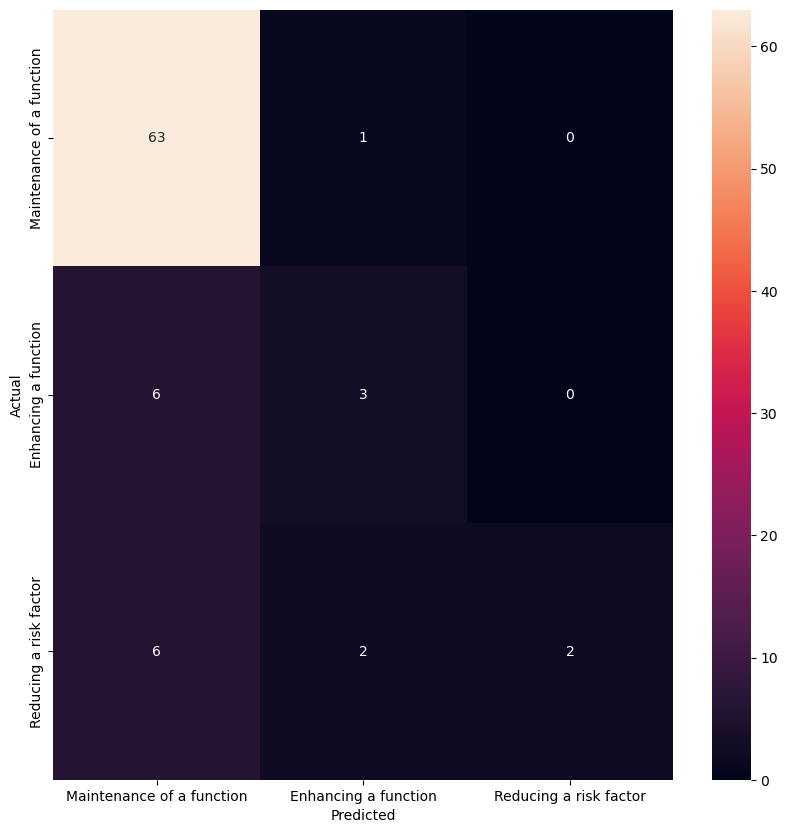

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


mod = LinearSVC()
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
#tfidf.fit_transform(x_train).toarray().shape
#tfidf.fit_transform(x_test).toarray().shape
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='d',
            xticklabels=category_id_df.Relationship.values, yticklabels=category_id_df.Relationship.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()